In [2]:
import numpy as np
import pandas as pd
np.random.seed(101)
from numpy.random import randint, randn
import datetime


In [15]:
cmp_code=list(np.random.randint(51,60,1258))
#Account=list(np.random.randint(1000,2000,365))

In [4]:
#Amount2=list(np.random.randint(10000, 50000, 365))

In [5]:
#cmp_code2=list(np.random.randint(51, 74, 365))

In [16]:
Expenses=list(np.random.randint(50, 500, 1258))
#Expenses

In [27]:
dataset_train = pd.read_csv('/home/Desktop/Azhar/TimeSeries/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/Google_Stock_Price_Train.csv')
Payable_Amt = dataset_train.iloc[:, 1:2].values
Receivable_Amt=dataset_train.iloc[:, 4:5].values
Expenses_Amt=Expenses
Date=pd.date_range(start='01/01/2015',periods=1258)

In [ ]:
#Amount = np.array(Amount)
Amount=Amount.squeeze()

In [32]:
l = pd.Series(['laundry_services','Miscelleanous','Gifts','Others','laundry_services','Snacks','Repair'
,'food','Repair','laundry_services','Flower_vase','Miscelleanous','Others'
,'Stationary','logistics','Daily_wages','salary','Operation_cost','CFO_EXPENSE','Others','Repair','Minor','Computer_accessories'
,'logistics','Gifts','Stationary','salary','food','Computer_accessories','Party_expense','laundry_services'
,'Snacks','Repair','food','Repair','Repair','Party_expense','Computer_accessories','Others','Maintenance','Gifts'
,'Office','Materials','Repair','donation','Gifts','Miscelleanous','laundry_services','Materials','Others'
,'Party_expense','food','Office','food','CTO_EXPENSES','Office','donation','food','Computer_accessories','CTO_EXPENSES','Flower_vase'
,'Daily_wages','daily_expense','Office','Party_expense','food','Snacks','Stationary','Operation_cost','food','Gifts',
'food','Miscelleanous','Computer_accessories','Major','laundry_services','logistics','Stationary','Minor'
,'Flower_vase','food','Flower_vase','CFO_EXPENSE','Materials','Repair','Computer_accessories','Genera','Office','Minor'
,'Computer_accessories' 'Gifts','Others','Major','Gifts','Miscelleanous','laundry_services','Materials'
,'Others','Party_expense','food','Office','food','CTO_EXPENSES','Office','donation','food','Computer_accessories'
,'CTO_EXPENSES','Flower_vase','Daily_wages','daily_expense','Office','Party_expense','food','Snacks','Stationary','Operation_cost'
,'food','Gifts','food','Miscelleanous','laundry_services','logistics','Stationary','Minor','laundry_services'
,'Flower_vase','Daily_wages','daily_expense','Office','Party_expense','food','Snacks','Repair','food','Repair']).unique()


In [33]:
l = list(l)

In [34]:
Expense_Type = []
for i in range(1258):
    Expense_Type.append(l[randint(len(l))])

In [36]:
print(len(Payable_Amt),len(Receivable_Amt),len(Expenses_Amt),len(cmp_code),len(Date),len(Expense_Type))

1258 1258 1258 1258 1258 1258


In [40]:
Payable_Amt=Payable_Amt.squeeze()
Receivable_Amt=Receivable_Amt.squeeze()
#Expenses_Amt=Expenses_Amt.squeeze()

In [13]:
#Amount3=list(np.random.randint(5000, 15000, 365))

In [41]:
CashFLow=pd.DataFrame(dict(Cmp_code=cmp_code,Payable_Amt=Payable_Amt,Receivable_Amt=Receivable_Amt,Expense_Type=Expense_Type,Expenses_Amt=Expenses_Amt),index=Date)

In [15]:
#AccReveivable=pd.DataFrame(dict(cmp_code2=cmp_code2,Amount2=Amount2),index=Date)

In [16]:
#Expenses=pd.DataFrame(dict(Expense_Type=Expense_Type,Amount3=Amount3),index=Date)

In [17]:
#AccReveivable.head()

In [18]:
#Expenses.head()

In [45]:
CashFLow.head()

,Cmp_code,Payable_Amt,Receivable_Amt,Expense_Type,Expenses_Amt
2015-01-01,51,325.25,663.59,CFO_EXPENSE,493
2015-01-02,55,331.27,666.45,Others,217
2015-01-03,53,329.83,657.21,Repair,98
2015-01-04,53,328.34,648.24,Miscelleanous,229
2015-01-05,57,322.04,620.76,Party_expense,339


In [47]:
#from dat
for i in range(len(CashFLow.index)):
    if str(CashFLow.index[i]) == '2018-01-05 00:00:00':
        print(i)
#    print()

1100


In [48]:
str(CashFLow.index[0])

'2015-01-01 00:00:00'

In [49]:
len(Payable_Amt)

1258

In [106]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test = train_test_split( CashFLow['Payable_Amt'],test_size=0.33, random_state=42)

In [109]:
def model_func(data):
    #training_set = AccPayable['Amount
    dataset_total=np.array(CashFLow[data].values)
    X_train, X_test = train_test_split( CashFLow['Payable_Amt'],test_size=0.33, random_state=42)
    dataset_test=dataset_total[1108:]
    training_set=dataset_total[:1108]
    # Feature Scaling
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))

    # Creating a data structure with 60 timesteps and 1 output
    X_train = []
    y_train = []
    for i in range(60, 1108):
        X_train.append(training_set_scaled[i-60:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



    # Part 2 - Building the RNN

    # Importing the Keras libraries and packages
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    from keras.layers import Dropout

    # Initialising the RNN
    regressor = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    # Adding a second LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding a third LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding a fourth LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))

    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)



    # Part 3 - Making the predictions and visualising the results

    return dataset_test, dataset_total,training_set,regressor,sc
 

In [71]:
dataset_test,dataset_total,training_set,regressor,sc=model_func('Payable_Amt')

Epoch 1/200
1048/1048 [==============================] - 8s 7ms/step - loss: 0.0606
Epoch 2/200
1048/1048 [==============================] - 3s 3ms/step - loss: 0.0071
Epoch 3/200
1048/1048 [==============================] - 3s 3ms/step - loss: 0.0058
Epoch 4/200
1048/1048 [==============================] - 4s 3ms/step - loss: 0.0056
Epoch 5/200
1048/1048 [==============================] - 4s 4ms/step - loss: 0.0052
Epoch 6/200
1048/1048 [==============================] - 4s 4ms/step - loss: 0.0050
Epoch 7/200
1048/1048 [==============================] - 4s 4ms/step - loss: 0.0051
Epoch 8/200
1048/1048 [==============================] - 4s 4ms/step - loss: 0.0050
Epoch 9/200
1048/1048 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 10/200
1048/1048 [==============================] - 4s 4ms/step - loss: 0.0050
Epoch 11/200
1048/1048 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 12/200
1048/1048 [==============================] - 4s 4ms/step - lo

1048/1048 [==============================] - 6s 5ms/step - loss: 9.4483e-04
Epoch 193/200
1048/1048 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 194/200
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0011
Epoch 195/200
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0011
Epoch 196/200
1048/1048 [==============================] - 6s 6ms/step - loss: 9.9907e-04
Epoch 197/200
1048/1048 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 198/200
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0012
Epoch 199/200
1048/1048 [==============================] - 5s 5ms/step - loss: 0.0012
Epoch 200/200
1048/1048 [==============================] - 6s 6ms/step - loss: 0.0011


(20, 60, 1)


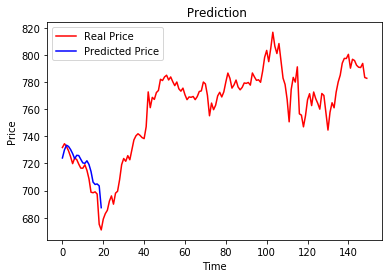

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
# Getting the real stock price of 2017
#dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price =dataset_test

# Getting the predicted stock price of 2017
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(training_set) - 60:]
#print(len(training_set), len(training_set) - 60,len(dataset_total))
#print('inputs',inputs)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    #print(i-60, i)
    #print(X_test,'\n')
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')
plt.title(' Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [73]:
training_set

array([325.25, 331.27, 329.83, ..., 720.76, 722.87, 724.01])

In [74]:
m=dataset_test
print(m)

[731.74 734.53 732.5  729.27 724.91 719.84 723.96 722.87 719.47 716.51
 716.48 719.   714.91 708.65 698.77 698.4  699.06 697.45 675.17 671.
 678.97 683.   685.47 692.2  696.06 689.98 698.08 699.5  708.05 719.12
 723.62 721.58 725.73 722.71 729.89 737.33 740.36 741.86 740.67 739.04
 738.28 747.04 772.71 761.09 768.69 767.18 772.22 773.78 782.   781.1
 783.75 785.   781.5  783.75 780.3  777.32 780.01 775.   773.27 775.48
 770.58 767.   769.   768.74 769.33 767.01 769.25 773.01 773.45 780.
 778.59 770.1  755.13 764.48 759.61 762.89 769.75 772.42 769.   772.66
 780.   786.59 782.74 775.5  777.85 781.44 776.33 774.25 776.03 779.31
 779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85 798.24
 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89 778.2
 767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97 755.2
 766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07 757.44
 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4  797.34
 800.4  790.2

In [75]:
predicted_stock_price

array([[724.0247 ],
       [729.9914 ],
       [733.43195],
       [732.4995 ],
       [730.2354 ],
       [727.2275 ],
       [723.48193],
       [725.9802 ],
       [725.79803],
       [723.01184],
       [720.37024],
       [720.07855],
       [721.9424 ],
       [719.23334],
       [714.0504 ],
       [706.2386 ],
       [704.50684],
       [704.88116],
       [703.45624],
       [687.39   ]], dtype=float32)

In [85]:
print("Enter the Date range for forcasting")
year = int(input('Enter a year'))
month = int(input('Enter a month'))
day = int(input('Enter a day'))
date1 = datetime.date(year, month, day)
print(str(date1),type(date1))
year = int(input('Enter a year'))
month = int(input('Enter a month'))
day = int(input('Enter a day'))
date2 = datetime.date(year, month, day)
delt=date2-date1
for i in range(len(CashFLow.index)):
    if str(CashFLow.index[i])[:10] == str(date1):
        dt_inx=i
        print(i)
        break
    
ts=training_set
pred_List=[]
for i in range(delt.days):
    print(len(ts))
    t_test=ts[(dt_inx+i)-60:(dt_inx+i)]
    t_test = t_test.reshape(-1,1)
    t_test = sc.transform(t_test)
    #print(len(t_test),t_test)
    t_test = np.array(t_test)
    #t_test = np.reshape(t_test, (t_test.shape[0], t_test.shape[1], 1))
    t_test = np.reshape(t_test, (1, t_test.shape[0], t_test.shape[1]))
    predicted_stock_price = regressor.predict(t_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    #print(predicted_stock_price,Amount[dt_inx+i])
    ts=np.append(ts,predicted_stock_price)
    pred_List.append(predicted_stock_price)
    #print(len(ts))
    
ts=[]    

Enter the Date range for forcasting
Enter a year2016
Enter a month1
Enter a day1
2016-01-01 <class 'datetime.date'>
Enter a year2016
Enter a month3
Enter a day1
365
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167


In [86]:
pred_List

[array([[436.48212]], dtype=float32),
 array([[439.4358]], dtype=float32),
 array([[444.54926]], dtype=float32),
 array([[445.46948]], dtype=float32),
 array([[443.23]], dtype=float32),
 array([[437.4863]], dtype=float32),
 array([[435.25986]], dtype=float32),
 array([[434.57437]], dtype=float32),
 array([[435.75995]], dtype=float32),
 array([[435.7884]], dtype=float32),
 array([[438.21786]], dtype=float32),
 array([[441.03653]], dtype=float32),
 array([[439.76422]], dtype=float32),
 array([[440.53183]], dtype=float32),
 array([[444.03058]], dtype=float32),
 array([[449.34918]], dtype=float32),
 array([[450.15912]], dtype=float32),
 array([[451.7096]], dtype=float32),
 array([[454.66095]], dtype=float32),
 array([[457.48755]], dtype=float32),
 array([[459.41827]], dtype=float32),
 array([[458.4925]], dtype=float32),
 array([[456.93387]], dtype=float32),
 array([[448.11606]], dtype=float32),
 array([[445.97296]], dtype=float32),
 array([[449.48117]], dtype=float32),
 array([[451.4087]],

In [114]:
print(len(np.array(pred_List).squeeze()),len(CashFLow[dt_inx:dt_inx+delt.days]))

60 60


In [133]:
Date2=pd.date_range(start='01/01/2016',end='02/29/2016')

In [134]:
len(Date2)

60

In [136]:
len(pred_List)

60

In [137]:
df=pd.DataFrame(dict(Date2=Date2,pred_l=pred_List),index=Date2)

In [138]:
css=CashFLow['Payable_Amt'][dt_inx:dt_inx+delt.days]

In [139]:
len(css)

60

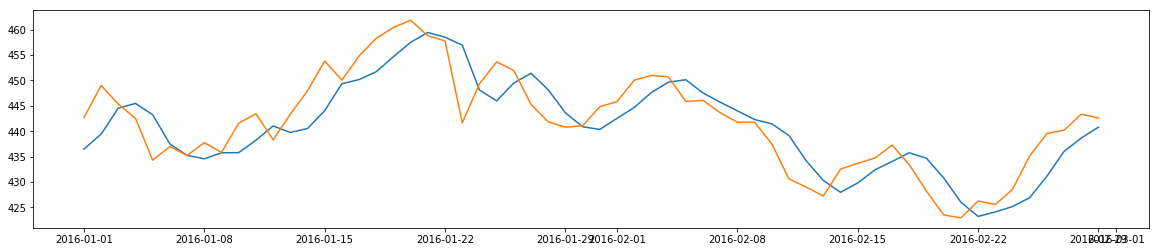

In [143]:
plt.figure(figsize=(20,4))
plt.plot(df['pred_l'])
#
#plt.figure(figsize=(20,4))
plt.plot(CashFLow['Payable_Amt'][dt_inx:dt_inx+delt.days])


In [211]:
str(AccPayable.index[99])[:10] == str(datetime.date(2018, 4, 10))

True

In [212]:
for i in range(len(AccPayable.index)):
    print(AccPayable.index[i])

2018-01-01 00:00:00
2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-05 00:00:00
2018-01-06 00:00:00
2018-01-07 00:00:00
2018-01-08 00:00:00
2018-01-09 00:00:00
2018-01-10 00:00:00
2018-01-11 00:00:00
2018-01-12 00:00:00
2018-01-13 00:00:00
2018-01-14 00:00:00
2018-01-15 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-20 00:00:00
2018-01-21 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00


In [207]:
str(datetime.date(2018, 4, 10))

'2018-04-10'

In [170]:
X_train.shape

(1048, 60, 1)

In [171]:
predicted_stock_price

array([[-0.5001395]], dtype=float32)